In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
fname = r"build/firstmap.txt"

f = open(fname,"r")
lines = f.readlines()

for line in lines:
    print(line, end="")


NMNMNNNM?NNMNNN?NM$NNNMM?NMNM?MN?NMNRRNNRNMNEMN?MR$NM?NMTNTTNTNNMM?NNMNNMRN?NNRMN?NNNEM?NNNNMMFNNNNNRNRNN0,3,0,16,0,0,0,2,2,0,0,24,0,0,0,2,0,12,40,0,0,0,3,2,20,0,64,0,2,4,4,0,32,0,32,0,1,12,0,0,96,0,1,0,10,8,0,16,64,1,1,0,12,8,0,32,2,0,4,12,0,64,0,0,4,4,8,0,0,32,0,0,6,4,0,16,0,0,2,14,0,8,0,0,0,6,8,8,0,0,0,0,4,4,20,0,0,0,0,0,8,0,8,0,0,

In [52]:
REPOS = lambda node: (node[0]*5, node[1]*20)
COLORS = {"M":"red", "E":"purple", "F":"black", "B":"black", "$":"yellow", "R":"green", "?":"blue", "T":"pink"}

def mapGraph(line):
    label_str = line[:105]
    arr = line[105:].split(",")
    arr = [int(arr[i]) for i in range(105)]
    print(len(label_str), label_str)
    print(len(arr), arr)
    
    adj_map = dict()
    pos_map = dict()
    label_map = dict()
    D = nx.DiGraph()
    
    color_map = []
    
    i = 0
    for y in range(15):
        for x in range(7):
            if label_str[i] != "N":
                node = (x,y)
                label_map[node] = label_str[i]
                adj_map[node] = arr[i]
                pos_map[node] = REPOS(node)
                D.add_node(node)
                
                color_map.append(COLORS[label_map[node]])
                
            i += 1
    BOSS = (3, 15)
    label_map[BOSS] = "B"
    adj_map[BOSS] = 0
    pos_map[BOSS] = REPOS(BOSS)
    D.add_node(BOSS)
    
    color_map.append(COLORS[label_map[BOSS]])
    
    
    i = 0
    for node in adj_map:
        (x,y) = node
        for x2 in range(7):
            if (1<<x2) & adj_map[node]:
                node2 = (x2, y+1)
                #print(node, "~", x2, "... node2 in D?", node2 in D.nodes())
                size1 = len(D.nodes())
                D.add_edge(node, node2)
                #print("D size same?", size1 == len(D.nodes()))
    
    #print(len(D.nodes()), "vertices...")
    #print(D.nodes())
    return D, label_map, pos_map, color_map

105 NMNMNNNM?NNMNNN?NM$NNNMM?NMNM?MN?NMNRRNNRNMNEMN?MR$NM?NMTNTTNTNNMM?NNMNNMRN?NNRMN?NNNEM?NNNNMMFNNNNNRNRNN
105 [0, 3, 0, 16, 0, 0, 0, 2, 2, 0, 0, 24, 0, 0, 0, 2, 0, 12, 40, 0, 0, 0, 3, 2, 20, 0, 64, 0, 2, 4, 4, 0, 32, 0, 32, 0, 1, 12, 0, 0, 96, 0, 1, 0, 10, 8, 0, 16, 64, 1, 1, 0, 12, 8, 0, 32, 2, 0, 4, 12, 0, 64, 0, 0, 4, 4, 8, 0, 0, 32, 0, 0, 6, 4, 0, 16, 0, 0, 2, 14, 0, 8, 0, 0, 0, 6, 8, 8, 0, 0, 0, 0, 4, 4, 20, 0, 0, 0, 0, 0, 8, 0, 8, 0, 0]


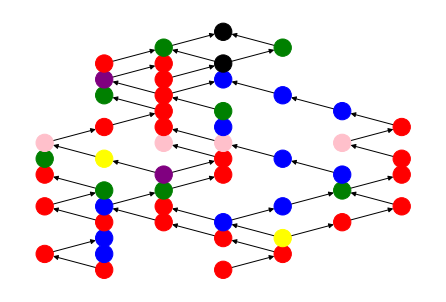

In [53]:
D, label_map, pos_map, color_map = mapGraph(line)
nx.draw(D, pos_map, node_color = color_map, with_labels = False)

In [55]:
# applies two basic reductions:
    #### SAME NEIGHBORHOOD ####
    # if A, B have same labels
    # and A, B have same (outgoing) neighborhood
    # then delete A or B
    
    #### SUBSET NEIGHBORHOOD ####
    # if A, B have same labels
    # and N_+(A) is a subset of N_+(B)
    # and N_-(A) is a subset of N_-(B)
    # then delete A

# finds a pair of vertices with same labels & neighbors
def sameNeighbors(D, rows, labels):
    for y in range(14, 0, -1):
        for n1 in rows[y]:
            l1, neigh1 = labels[n1], set(D.neighbors(n1)) 
            for n2 in rows[y]:
                if n1 != n2 and l1 == labels[n2]:
                    print(n1, n2, "same label")

def basicReductions(D, labels):
    rows = [set() for i in range(16)]
    for node in D.nodes():
        rows[node[1]].add(node)
    sameNeighbors(D, rows, labels)

In [56]:
basicReductions(D, label_map)

(2, 14) (4, 14) same label
(4, 14) (2, 14) same label
(1, 13) (2, 13) same label
(2, 13) (1, 13) same label
(2, 9) (1, 9) same label
(2, 9) (6, 9) same label
(1, 9) (2, 9) same label
(1, 9) (6, 9) same label
(6, 9) (2, 9) same label
(6, 9) (1, 9) same label
(0, 8) (5, 8) same label
(0, 8) (3, 8) same label
(0, 8) (2, 8) same label
(5, 8) (0, 8) same label
(5, 8) (3, 8) same label
(5, 8) (2, 8) same label
(3, 8) (0, 8) same label
(3, 8) (5, 8) same label
(3, 8) (2, 8) same label
(2, 8) (0, 8) same label
(2, 8) (5, 8) same label
(2, 8) (3, 8) same label
(3, 7) (6, 7) same label
(6, 7) (3, 7) same label
(0, 6) (3, 6) same label
(0, 6) (6, 6) same label
(3, 6) (0, 6) same label
(3, 6) (6, 6) same label
(6, 6) (0, 6) same label
(6, 6) (3, 6) same label
(5, 5) (2, 5) same label
(5, 5) (1, 5) same label
(2, 5) (5, 5) same label
(2, 5) (1, 5) same label
(1, 5) (5, 5) same label
(1, 5) (2, 5) same label
(4, 4) (1, 4) same label
(2, 4) (0, 4) same label
(2, 4) (6, 4) same label
(0, 4) (2, 4) sam

In [35]:
D.in_edges.data()[(15,3)]

TypeError: 'InEdgeDataView' object is not subscriptable

In [32]:
D.edges((15,3)).data()

AttributeError: 'OutEdgeDataView' object has no attribute 'data'

In [40]:
for elt in D.in_edges([(0,0), (0,1)]):
    print(elt)

((1, 0), (0, 1))


In [46]:
set(D.neighbors((0,1))) == set([(1,2)])

True

In [50]:
set(D.predecessors((3,15)))

{(2, 14), (4, 14)}